In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", pd.NaT, inplace=True)
df.dropna(inplace=True)
mask = ((df["salary K$"] > 50) & (df["salary"] == ">50K")) | ((df["salary K$"] <= 50) & (df["salary"] == "<=50K"))
df = df[mask]
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [3]:
df.value_counts("sex")

sex
Male      20380
Female     9782
dtype: int64

# Task 2
Find the average age of men in dataset

In [4]:
men = df[df["sex"] == "Male"]
men["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [19]:
(df["native-country"] == "Poland").mean() * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [16]:
earn_gt_50k = df[df["salary K$"] > 50]["age"]
earn_le_50k = df[df["salary K$"] <= 50]["age"]

pd.DataFrame({
    "age": ["mean", "std"],
    "gt 50K": [earn_gt_50k.mean(), earn_gt_50k.std()],
    "le 50K": [earn_le_50k.mean(), earn_le_50k.std()],
}).set_index("age")

,gt 50K,le 50K
age,,
mean,43.959110,36.608060
std,10.269633,13.464631


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [22]:
people_earn_gt_50k = df[df["salary K$"] > 50]
people_earn_gt_50k.loc[~people_earn_gt_50k.education.isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [28]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [37]:
married = df.loc[df["marital-status"].str.startswith("Married")]
non_married = df.loc[~df["marital-status"].str.startswith("Married")]

married_gt_50k = married[married["salary K$"] > 50]["salary K$"]
non_married_gt_50k = non_married[non_married["salary K$"] > 50]["salary K$"]

married_le_50k = married[married["salary K$"] <= 50]["salary K$"]
non_married_le_50k = non_married[non_married["salary K$"] <= 50]["salary K$"]

pd.DataFrame({
    "status": ["married", "non-married"],
    "gt 50K": [married_gt_50k.mean(), non_married_gt_50k.mean()],
    "le 50K": [married_le_50k.mean(), non_married_le_50k.mean()]
}).set_index("status")

,gt 50K,le 50K
status,,
married,201.157609,31.991392
non-married,197.127341,32.013253


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [47]:
max_hours = df["hours-per-week"].max()
people_count = df[df["hours-per-week"] == max_hours]["hours-per-week"].count()
print(f"{people_count} people work {max_hours} hours per week")

78 people work 99 hours per week


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

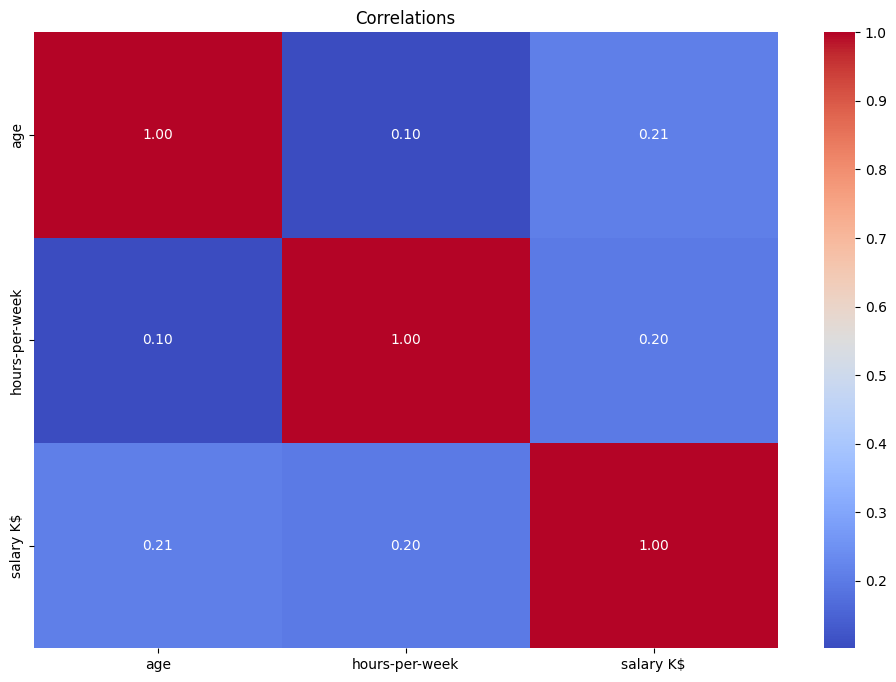

In [58]:
corr = df[["age", "hours-per-week", "salary K$"]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlations")
plt.show()